# Conversational AI: Natural Language Processing (UCS664)
# Assignment-2(b)

Suvrat Arora <br>
101903331 <br>
3CO13 <br>

In [2]:
import nltk

In [3]:
from nltk.corpus import *

**Q1: Find names in the name corpus that are ambiguous for male and female gender?**

In [6]:
[w for w in names.words(fileids='male.txt') if w in names.words(fileids='female.txt')]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

**Q2: Investigate the holonym-meronym relations for some nouns. Remember that there are three  kinds of holonym-meronym relation, so you need to use member_meronyms() , part_meronyms() ,  substance_meronyms() , member_holonyms() , part_holonyms() , and substance_holonyms()**

In [22]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\suvra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [37]:
wordnet.synsets('book')

[Synset('book.n.01'),
 Synset('book.n.02'),
 Synset('record.n.05'),
 Synset('script.n.01'),
 Synset('ledger.n.01'),
 Synset('book.n.06'),
 Synset('book.n.07'),
 Synset('koran.n.01'),
 Synset('bible.n.01'),
 Synset('book.n.10'),
 Synset('book.n.11'),
 Synset('book.v.01'),
 Synset('reserve.v.04'),
 Synset('book.v.03'),
 Synset('book.v.04')]

In [38]:
#part_meronyms()
wordnet.synset('book.n.01').part_meronyms()

[Synset('running_head.n.01'), Synset('signature.n.05')]

In [73]:
wordnet.synsets('tree')

[Synset('tree.n.01'),
 Synset('tree.n.02'),
 Synset('tree.n.03'),
 Synset('corner.v.02'),
 Synset('tree.v.02'),
 Synset('tree.v.03'),
 Synset('tree.v.04')]

In [77]:
#substance_meronyms()
wordnet.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [80]:
#member_meronyms()
wordnet.synset('train.n.01').member_meronyms()

[Synset('car.n.02'), Synset('locomotive.n.01')]

In [84]:
#part holonym
wordnet.synset('sandwich.n.0').part_holonyms()

[Synset('meal.n.01')]

In [95]:
#substance holonym
wordnet.synset('plant.n.0').substance_holonyms()

[]

**Q3: Define a conditional frequency distribution over the Names Corpus that allows you to see  which initial letters are more frequent for males versus females?**


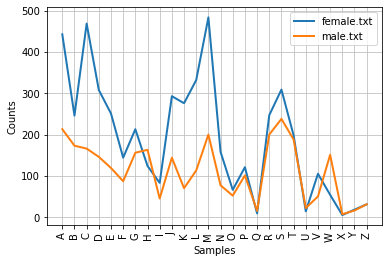

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
cfd=nltk.ConditionalFreqDist(
    (fileid,name[0])
    for fileid in names.fileids()
    for name in names.words(fileid)
)
cfd.plot()

**Q4: Define a function supergloss(s) that takes a synset s as its argument and returns a string  consisting of the concatenation of the definition of s , and the definitions of all the hypernyms?** 

In [101]:
#def supergloss(s):
wordnet.synset('cup.n.01').hypernyms()

[Synset('container.n.01'), Synset('crockery.n.01')]

In [121]:
def supergloss(s):
    Hypernyms=wordnet.synset(s).hypernyms()
    string=''
    for i in Hypernyms:
        string=string+ i.definition()+" | "
    return string

definition_string=supergloss('cup.n.01')
definition_string

'any object that can be used to hold things (especially a large metal boxlike object of standardized dimensions that can be loaded from one form of transport to another) | tableware (eating and serving dishes) collectively | '

**Q5: The polysemy of a word is the number of senses it has. Using WordNet, we can determine that  the noun dog has seven senses with len(wn.synsets('dog', 'n')) . Compute the average polysemy of  nouns, verbs, adjectives, and adverbs according to WordNet.**

In [10]:
from nltk.corpus import wordnet as wn
poly_nouns = list(wn.all_synsets('n'))


def calc_words(synset):
	all_words = []
	for syn in synset:
		all_words += syn.lemma_names()
	# eliminates duplicates and gets the count
	total = len(set(all_words))
	return total

def total_senses(synset):
	senses = sum(1 for x in synset)
	return senses


def average_polysemy(synset):
	average = total_senses(synset) / calc_words(synset)
	return average


print(total_senses(poly_nouns))
print(calc_words(poly_nouns))

82115
119034
